In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Загрузка датасета

In [2]:
fields = pd.read_csv('Dataset/fields_norm.csv')
fields_with = fields
fields = fields[fields['crop'] == "злаки"]
fields.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,...,yield_fact,is_anomaly_p2o5,is_anomaly_k2o,is_anomaly_ph,is_anomaly_humus,is_anomaly_yield_plan,is_anomaly_yield_fact,is_anomaly_area,count_anomaly,region_raw
0,22.47.01.001.01,Другое,пашня,NaN,2023,злаки,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,...,2.465597,False,False,False,False,False,False,True,0,Алтай
3,22.47.01.003.00,Другое,пашня,4.0,2023,злаки,Пар,NaN,452.25,Скипетр,...,2.602692,False,False,False,False,False,False,True,0,Алтай
4,22.47.01.004.00,Другое,пашня,3.0,2023,злаки,Пар,NaN,269.64,Скипетр,...,2.836971,False,False,False,False,False,False,True,0,Алтай
7,22.47.01.006.02,Другое,пашня,2.0,2023,злаки,Пар,NaN,63.33,Скипетр,...,2.186171,False,False,False,False,False,False,False,0,Алтай
9,22.47.01.007.02,Другое,пашня,3.0,2023,злаки,Пар,NaN,85.55,Скипетр,...,2.107560,False,False,False,False,False,False,False,0,Алтай


## Визуализации



Распределения данных

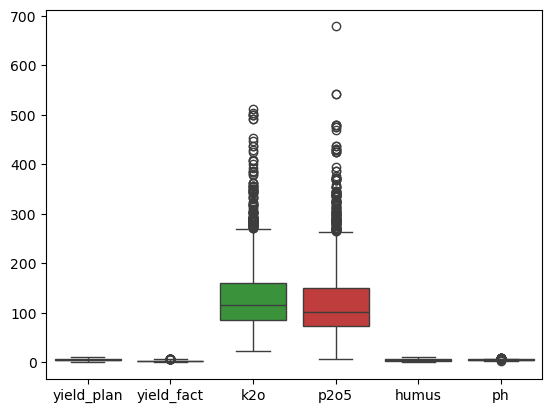

In [3]:
sns.boxplot(fields[['yield_plan', 'yield_fact', 'k2o','p2o5', 'humus', 'ph']])
None

Плановая урожайность

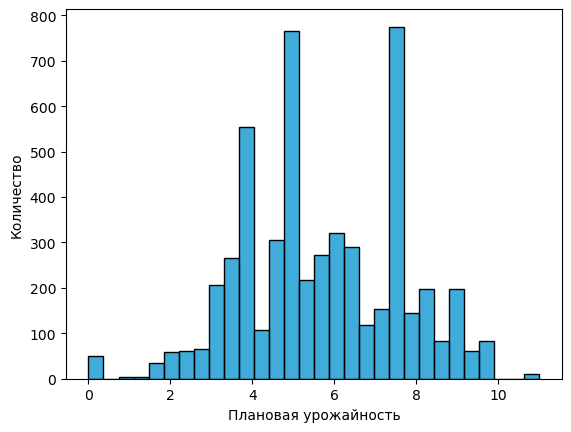

In [4]:
ax = sns.histplot(fields['yield_plan'], color="#0090CD")
ax.set_xlabel("Плановая урожайность")
ax.set_ylabel("Количество")
None

Фактическая урожайность

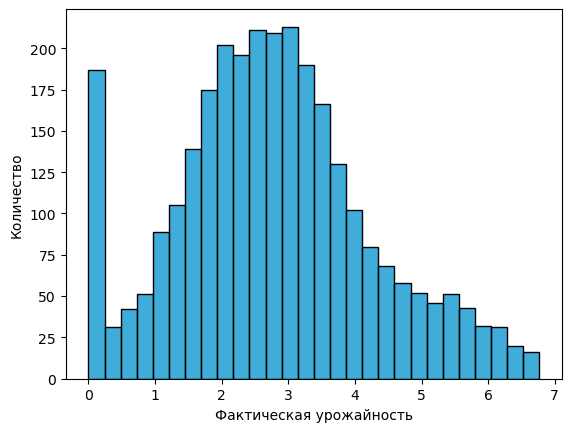

In [5]:
ax = sns.histplot(fields['yield_fact'], color="#0090CD")
ax.set_xlabel("Фактическая урожайность")
ax.set_ylabel("Количество")
None

Хим состав почвы

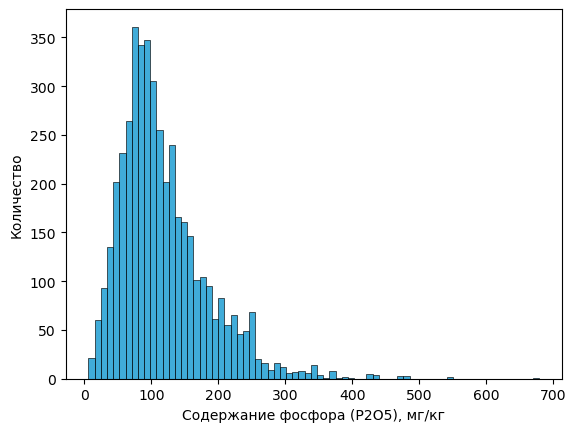

In [6]:
ax = sns.histplot(fields['p2o5'], color="#0090CD")
ax.set_xlabel("Содержание фосфора (P2O5), мг/кг")
ax.set_ylabel("Количество")
None

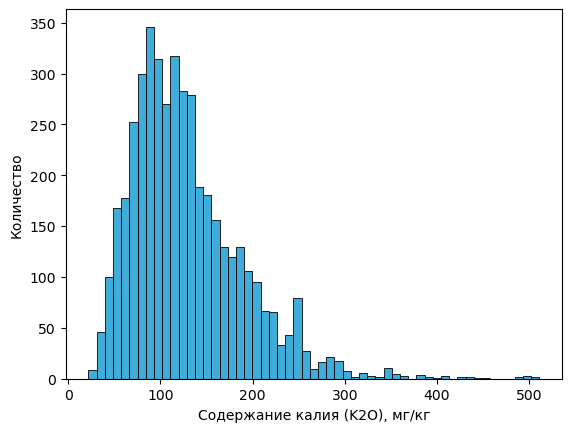

In [7]:
ax = sns.histplot(fields['k2o'], color="#0090CD")
ax.set_xlabel("Содержание калия (K2O), мг/кг")
ax.set_ylabel("Количество")
None

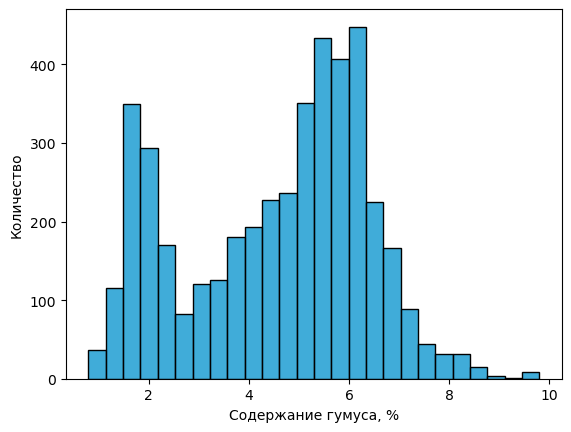

In [8]:
ax = sns.histplot(fields['humus'], color="#0090CD")
ax.set_xlabel("Содержание гумуса, %")
ax.set_ylabel("Количество")
None

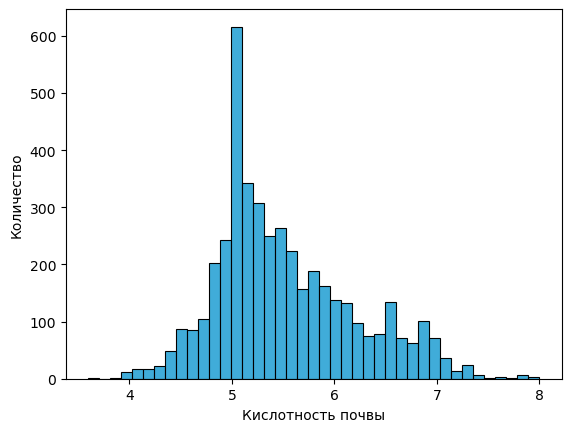

In [9]:
ax = sns.histplot(fields['ph'], color="#0090CD")
ax.set_xlabel("Кислотность почвы")
ax.set_ylabel("Количество")
None

In [10]:
filtered = fields[(fields['count_anomaly'] == 0) & ~fields['is_anomaly_yield_fact']]

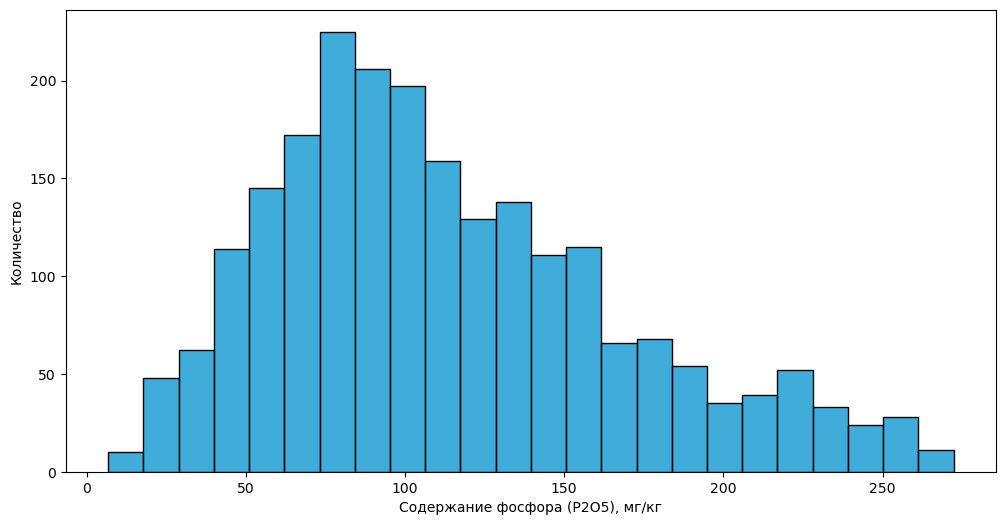

In [11]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(filtered['p2o5'], color="#0090CD")
ax.set_xlabel("Содержание фосфора (P2O5), мг/кг")
ax.set_ylabel("Количество")
None

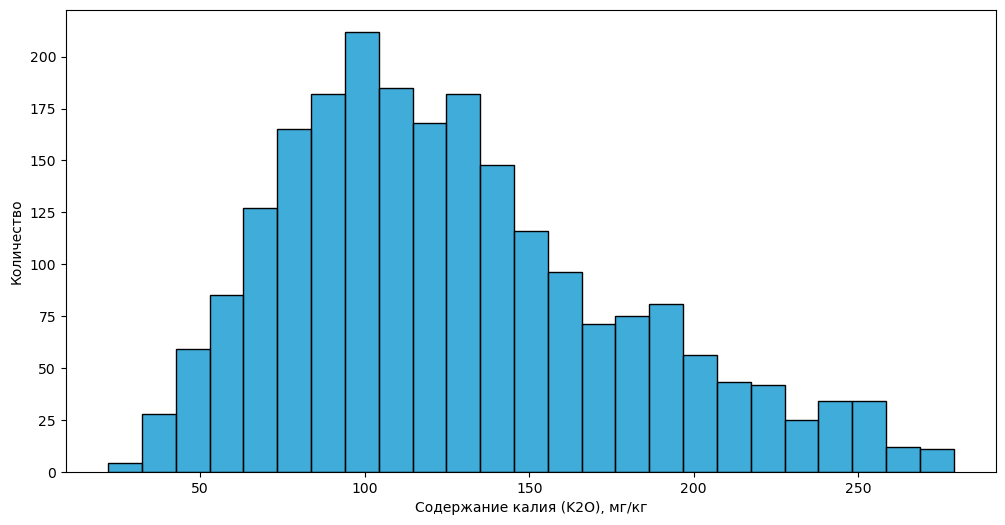

In [12]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(filtered['k2o'], color="#0090CD")
ax.set_xlabel("Содержание калия (K2O), мг/кг")
ax.set_ylabel("Количество")
None

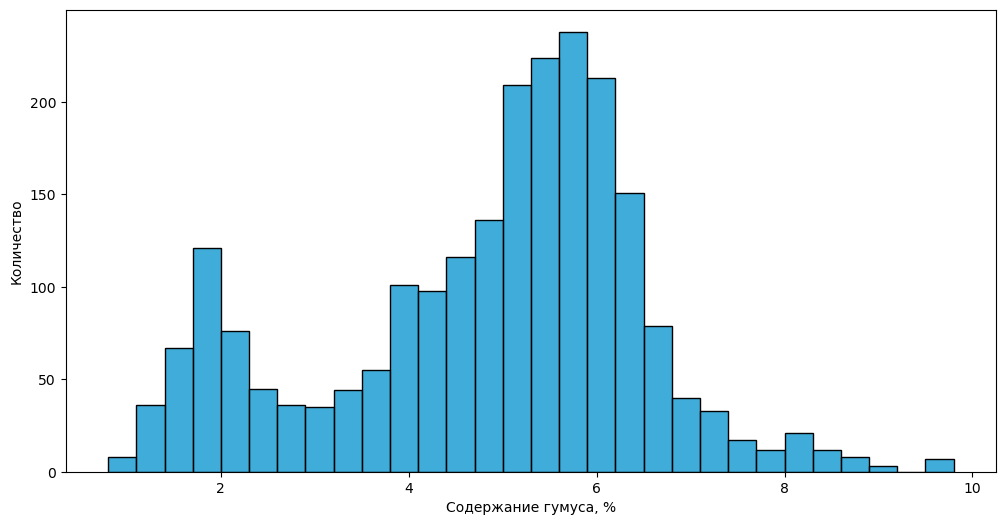

In [13]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(filtered['humus'], color="#0090CD")
ax.set_xlabel("Содержание гумуса, %")
ax.set_ylabel("Количество")
None

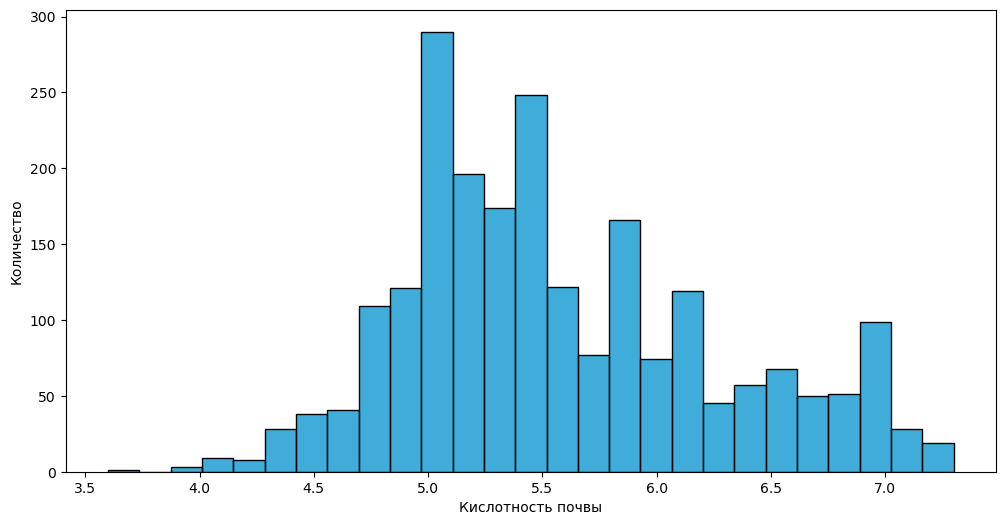

In [14]:
plt.subplots(figsize=(12, 6))

ax = sns.histplot(filtered['ph'], color="#0090CD")
ax.set_xlabel("Кислотность почвы")
ax.set_ylabel("Количество")
None

Наложение фактической и плановой урожайности

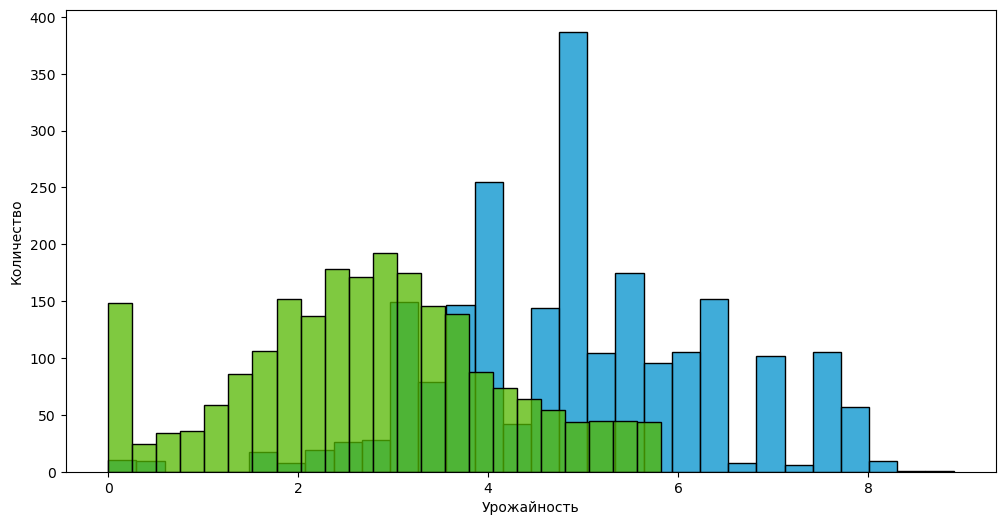

In [15]:
filtered = fields[(fields['count_anomaly'] == 0) & ~fields['is_anomaly_yield_fact']]

plt.subplots(figsize=(12, 6))

ax = sns.histplot(filtered['yield_plan'], color="#0090CD")
sns.histplot(filtered['yield_fact'], color="#54B800")
ax.set_xlabel("Урожайность")
ax.set_ylabel("Количество")
None

Фактическая урожайность после выбросов

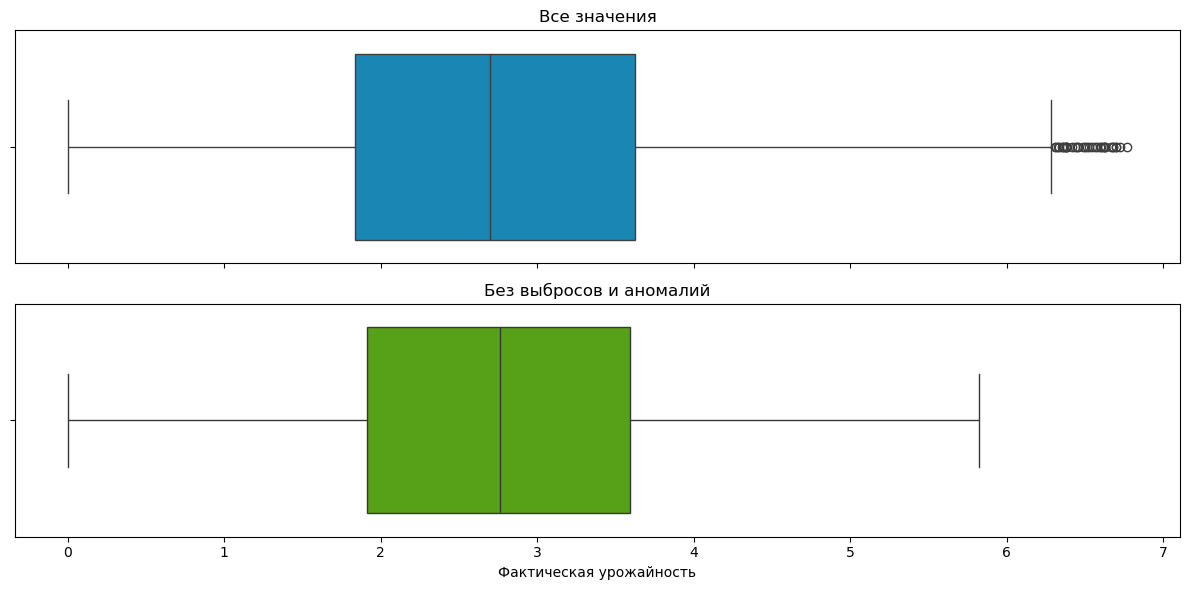

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Первый boxplot
sns.boxplot(
    x=fields['yield_fact'],
    orient='h',
    ax=axes[0],
    color="#0090CD"
)
axes[0].set_title("Все значения")
axes[0].set_xlabel("Фактическая урожайность")
# print(fields['yield_fact'].describe())
# print()
# print(filtered['yield_fact'].describe())
# Второй boxplot
sns.boxplot(
    x=filtered['yield_fact'],
    orient='h',
    ax=axes[1],
    color="#54B800"
)
axes[1].set_title("Без выбросов и аномалий")
axes[1].set_xlabel("Фактическая урожайность")

# Устанавливаем общий стиль
plt.tight_layout()

Фактическая урожайность по сезонам

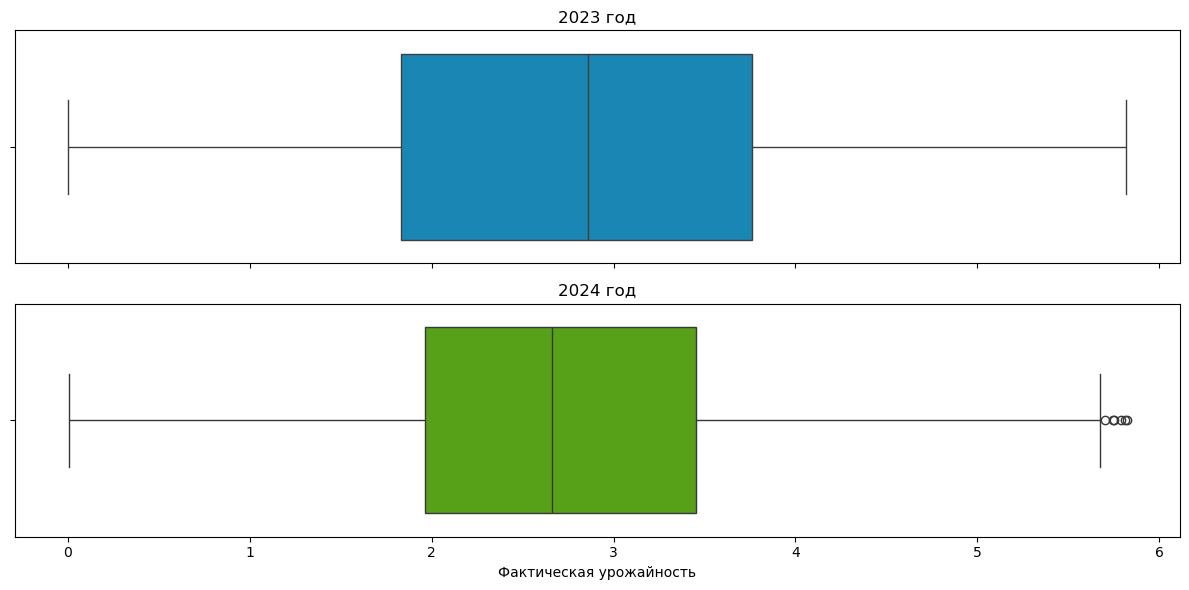

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Первый boxplot
sns.boxplot(
    x=filtered[filtered['season'] == 2023]['yield_fact'],
    orient='h',
    ax=axes[0],
    color="#0090CD"
)
axes[0].set_title("2023 год")
axes[0].set_xlabel("Фактическая урожайность")
# print(fields['yield_fact'].describe())
# print()
# print(filtered['yield_fact'].describe())
# Второй boxplot
sns.boxplot(
    x=filtered[filtered['season'] == 2024]['yield_fact'],
    orient='h',
    ax=axes[1],
    color="#54B800"
)
axes[1].set_title("2024 год")
axes[1].set_xlabel("Фактическая урожайность")

# Устанавливаем общий стиль
plt.tight_layout()

Распределение по регионам

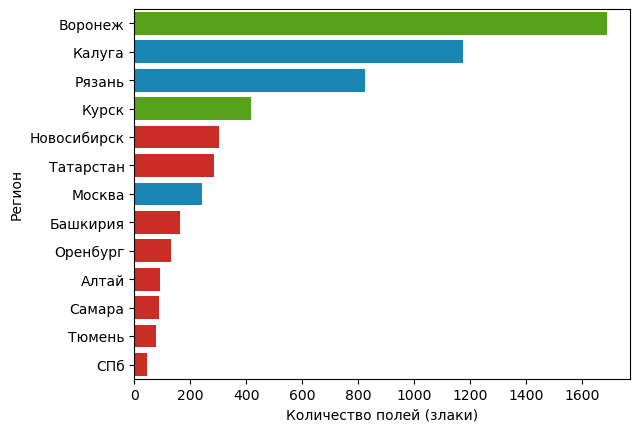

In [18]:
grouped = fields.groupby(['region_raw', 'region']).aggregate({'field': 'count'}).reset_index().sort_values('field', ascending=False)

ax = sns.barplot(grouped, x="field", y="region_raw", hue="region", palette={"КурВо": "#54B800", "МосКаРя": "#0090CD", "Другое": "#E4140B"})
ax.set_ylabel("Регион")
ax.set_xlabel("Количество полей (злаки)")
ax.get_legend().set_visible(False)

None

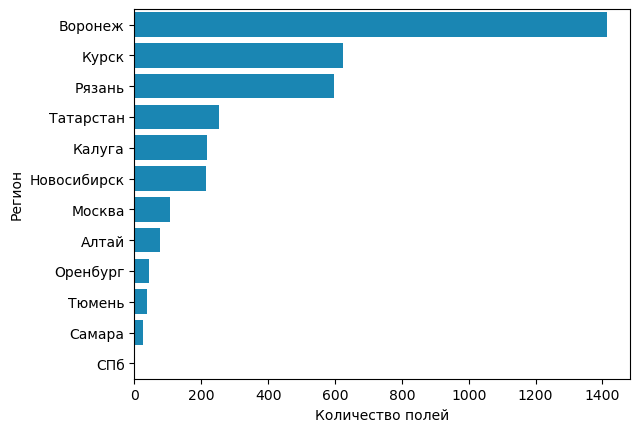

In [19]:
grouped = fields_with[(fields_with['count_anomaly'] == 0) & ~fields_with['is_anomaly_yield_fact']].groupby(['region_raw', 'region']).aggregate({'field': 'count'}).reset_index().sort_values('field', ascending=False)

ax = sns.barplot(grouped, x="field", y="region_raw", color="#0090CD")
ax.set_ylabel("Регион")
ax.set_xlabel("Количество полей")

None

Распределение по культурам

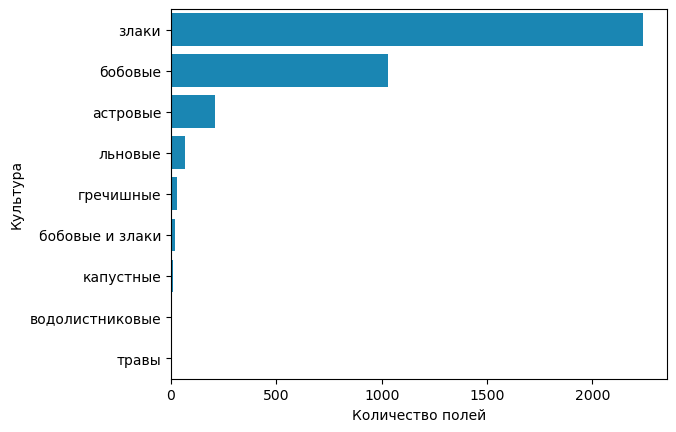

In [20]:
grouped = fields_with[(fields_with['count_anomaly'] == 0) & ~fields_with['is_anomaly_yield_fact']].groupby(['crop']).aggregate({'field': 'count'}).reset_index().sort_values('field', ascending=False)

ax = sns.barplot(grouped, x="field", y="crop", color="#0090CD")
ax.set_ylabel("Культура")
ax.set_xlabel("Количество полей")

None

Матрица корреляций

In [21]:
tmp_df = fields[['yield_fact', 'yield_plan', 'area', 'p2o5', 'k2o', 'humus', 'ph']]
tmp_df.columns = ['Факт урожайность', 'План урожайность', 'Площадь', 'Фосфор', 'Калий', 'Гумус', 'Кислотность']
corr = tmp_df.corr(numeric_only=True)
corr

,Факт урожайность,План урожайность,Площадь,Фосфор,Калий,Гумус,Кислотность
Факт урожайность,1.000000,0.484791,-0.092440,-0.043852,-0.014187,0.050022,0.027181
План урожайность,0.484791,1.000000,-0.159626,-0.113122,-0.120629,-0.147455,-0.040498
Площадь,-0.092440,-0.159626,1.000000,0.129201,0.105442,0.137032,-0.080940
Фосфор,-0.043852,-0.113122,0.129201,1.000000,0.455068,0.036554,0.067889
Калий,-0.014187,-0.120629,0.105442,0.455068,1.000000,0.351595,0.082835
Гумус,0.050022,-0.147455,0.137032,0.036554,0.351595,1.000000,0.415881
Кислотность,0.027181,-0.040498,-0.080940,0.067889,0.082835,0.415881,1.000000


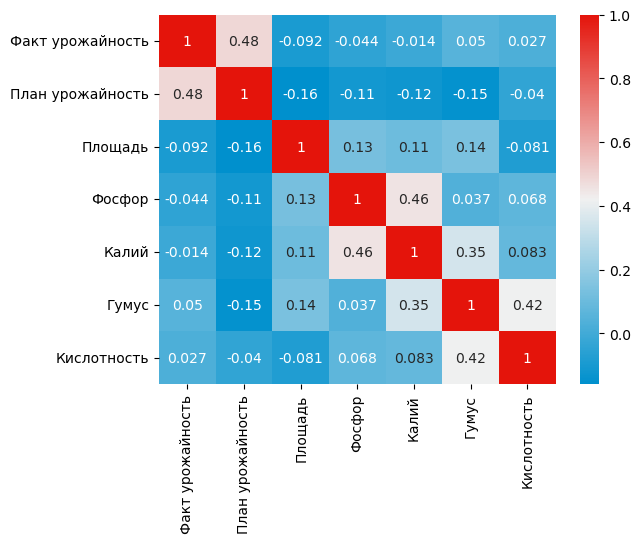

In [22]:
sns.heatmap(corr, annot=True, cmap=sns.color_palette("blend:#0090CD,#F0F0F0,#E4140B", as_cmap=True))
None